In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.cluster import KMeans

In [2]:
ratings = pd.read_csv('C:/Users/ROJASQI FADILLA/Bismillah/ratings_movies.csv')
ratings.head()

userId  movieId  rating   timestamp
0       1       16     4.0  1217897793
1       1       24     1.5  1217895807
2       1       32     4.0  1217896246
3       1       47     4.0  1217896556
4       1       50     4.0  1217896523

In [3]:
movies = pd.read_csv('C:/Users/ROJASQI FADILLA/Bismillah/title_movies.csv')
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [4]:
#movie-level-clustering
#kita lihat lebih jauh dan lihat bagaimana user menilai masing2 movie. 

In [5]:
#menggabungkan 2 tabel lalu buat matriks/pivot jadi pnya kerangka data Users X Movies
ratings_title = pd.merge(ratings, movies[['movieId', 'title']], on='movieId' )
user_movie_ratings = pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')

print('dimensi dataset: ', user_movie_ratings.shape)
user_movie_ratings

dimensi dataset:  (668, 10323)


title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              NaN                                      NaN   
2              NaN                                      NaN   
3              NaN                                      NaN   
4              NaN                                      NaN   
5              NaN                                      NaN   
...            ...                                      ...   
664            NaN                                      NaN   
665            NaN                                      NaN   
666            NaN                                      NaN   
667            NaN                                      NaN   
668            NaN                                      NaN   

title   'Round Midnight (1986)  'Til There Was You (1997)  'burbs, The (1989)  \
userId                                                                          
1                          NaN                        NaN                 NaN   
2                          NaN                        NaN                 NaN   
3                          NaN                        NaN                 NaN   
4                          NaN                        NaN                 NaN   
5                          NaN                        NaN                 NaN   
...                        ...                        ...                 ...   
664                        NaN                        NaN                 NaN   
665                        NaN                        NaN                 NaN   
666                        NaN                        NaN                 NaN   
667                        NaN                        NaN                 NaN   
668                        2.5                        NaN                 NaN   

title   'night Mother (1986)  (500) Days of Summer (2009)  \
userId                                                      
1                        NaN                          NaN   
2                        NaN                          NaN   
3                        NaN                          NaN   
4                        NaN                          NaN   
5                        NaN                          NaN   
...                      ...                          ...   
664                      NaN                          NaN   
665                      NaN                          NaN   
666                      NaN                          NaN   
667                      NaN                          NaN   
668                      NaN                          2.0   

title   *batteries not included (1987)  ...And Justice for All (1979)  \
userId                                                                  
1                                  NaN                            NaN   
2                                  NaN                            NaN   
3                                  NaN                            NaN   
4                                  NaN                            NaN   
5                                  NaN                            NaN   
...                                ...                            ...   
664                                NaN                            NaN   
665                                NaN                            NaN   
666                                NaN                            NaN   
667                                NaN                            NaN   
668                                NaN                            3.0   

title   10 (1979)  ...  [REC] (2007)  [REC]² (2009)  [REC]³ 3 Génesis (2012)  \
userId             ...                                                         
1             NaN  ...           NaN            NaN                      NaN   
2             NaN  ...           NaN            NaN                      NaN   
3             NaN  ...           NaN            NaN           

In [6]:
#didominasi dgn nilai nan sbgaian bsar user tdk mmberi rating dn menonton sbgian bsar movie,
#ini disebut data jarang/sparse krn hnya bbrp cell yg pnya nilai
#utk mensiasati sya akan urutkan brdsrkn movie dgn rating tertinggi, dan user yg memiliki rating movie terbanyak.

In [7]:
#fungsi mencari movie tertinggi
def getMostRatedMovies(user_movie_ratings, max_number_of_movies):
    #itung
    user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)
    #sortir
    user_movie_ratings_sorted = user_movie_ratings.sort_values(len(user_movie_ratings)-1, axis=1, ascending=False)
    user_movie_ratings_sorted = user_movie_ratings_sorted.drop(user_movie_ratings_sorted.tail(1).index)
    #tmplkan
    mostRatedMovies = user_movie_ratings_sorted.iloc[:, :max_number_of_movies]
    return mostRatedMovies

#fungsi mncari user tertinggi
def getMostUsers(most_rated_movies, max_number_of_movies):
    #user yg mmberi rating trbnyak
    #itung
    most_rated_movies['counts'] = pd.Series(most_rated_movies.count(axis=1))
    #sortir
    most_rated_movies_users = most_rated_movies.sort_values('counts', ascending=False)
    #tmplkan
    mostMovieUserSelection = most_rated_movies_users.iloc[:max_number_of_movies, :]
    mostMovieUserSelection = mostMovieUserSelection.drop(['counts'], axis=1)
    
    return mostMovieUserSelection

#fungsi mncari movie tertinggi dn user tertinggi
def filterRatingMovie(user_movie_ratings, n_movies, n_users):
    mostRatedMoviesUsers = getMostRatedMovies(user_movie_ratings, n_movies)
    mostRatedMoviesUsers = getMostUsers(mostRatedMoviesUsers, n_users)
    return mostRatedMoviesUsers

In [9]:
n_movies = 20
n_users = 20
mntepRatedMoviesUsers = filterRatingMovie(user_movie_ratings, n_movies, n_users)

print('dimensi dataset: ', mntepRatedMoviesUsers.shape)
mntepRatedMoviesUsers.head(20)

dimensi dataset:  (20, 20)


title  Pulp Fiction (1994)  Forrest Gump (1994)  \
667                    4.0                  4.0   
401                    4.0                  4.5   
88                     4.0                  2.0   
108                    5.0                  4.0   
112                    4.0                  4.0   
127                    5.0                  4.5   
176                    4.0                  4.5   
212                    5.0                  4.5   
223                    4.5                  5.0   
229                    4.0                  4.0   
249                    4.5                  2.5   
309                    4.0                  3.5   
353                    4.0                  0.5   
61                     5.0                  4.0   
357                    5.0                  2.5   
87                     5.0                  5.0   
574                    4.0                  2.5   
404                    4.5                  5.0   
457                    5.0                  4.0   
632                    5.0                  3.5   

title  Shawshank Redemption, The (1994)  Jurassic Park (1993)  \
667                                 4.0                   4.0   
401                                 5.0                   3.5   
88                                  4.5                   4.5   
108                                 5.0                   4.0   
112                                 4.5                   3.0   
127                                 5.0                   3.5   
176                                 5.0                   3.0   
212                                 5.0                   4.0   
223                                 5.0                   4.5   
229                                 5.0                   3.0   
249                                 4.0                   2.5   
309                                 4.5                   3.0   
353                                 4.0                   3.0   
61                                  4.5                   3.0   
357                                 3.5                   5.0   
87                                  5.0                   4.5   
574                                 4.5                   4.0   
404                                 5.0                   4.5   
457                                 4.0                   2.0   
632                                 5.0                   4.0   

title  Silence of the Lambs, The (1991)  \
667                                 4.5   
401                                 3.5   
88                                  4.0   
108                                 5.0   
112                                 3.5   
127                                 4.0   
176                                 4.5   
212                                 4.0   
223                                 4.0   
229                                 4.0   
249                                 4.0   
309                                 3.5   
353                                 3.0   
61                                  4.5   
357                                 3.5   
87                                  5.0   
574                                 4.5   
404                                 5.0   
457                                 5.0   
632                                 4.0   

title  Star Wars: Episode IV - A New Hope (1977)  Matrix, The (1999)  \
667                                          3.0                 4.0   
401                                          3.5                 5.0   
88                                           4.0                 3.5   
108                                          5.0                 5.0   
112                                          4.5                 3.5   
127                                          3.5                 4.0   
176                                          5.0                 4.5   
212                                          4.0                 4.5   
223       

In [10]:
#visualisasikan hasil most rating diatas
#import bar color
from mpl_toolkits.axes_grid1 import make_axes_locatable
#fungsi memvisualisasikan heatmap hasil dari user&movie tertinggi
#teknik visualisasi data yang menunjukkan besarnya fenomena sebagai warna dalam dua dimensi
#Variasi warna dapat dilakukan dengan rona atau intensitas, memberikan isyarat visual yang jelas kepada pembaca
def visualMoviesHeatmap(mostMovieUserSelection, axis_labels=True):
    
    #mncocokan urutan dataframe yg akan ditamplkan
    
    fig = plot.figure(figsize=(15,4))
    ax = plot.gca()
    
    #Visual heatmap
    heatmap = ax.imshow(mostMovieUserSelection,  interpolation='nearest', vmin=0, vmax=5, aspect='auto')

    if axis_labels:
        ax.set_yticks(np.arange(mostMovieUserSelection.shape[0]) , minor=False)
        ax.set_xticks(np.arange(mostMovieUserSelection.shape[1]) , minor=False)
        ax.invert_yaxis()
        ax.xaxis.tick_top()
        labels = mostMovieUserSelection.columns.str[:40]
        ax.set_xticklabels(labels, minor=False)
        ax.set_yticklabels(mostMovieUserSelection.index, minor=False)
        plot.setp(ax.get_xticklabels(), rotation=90)
    else:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    ax.grid(False)
    ax.set_ylabel('User id')

    #beri separe heatmap dari warna bar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    # warna bar
    cbar = fig.colorbar(heatmap, ticks=[5, 4, 3, 2, 1, 0], cax=cax)
    cbar.ax.set_yticklabels(['5 bintang', '4 bintang','3 bintang','2 bintang','1 bintang','0 bintang'])

    plot.show()

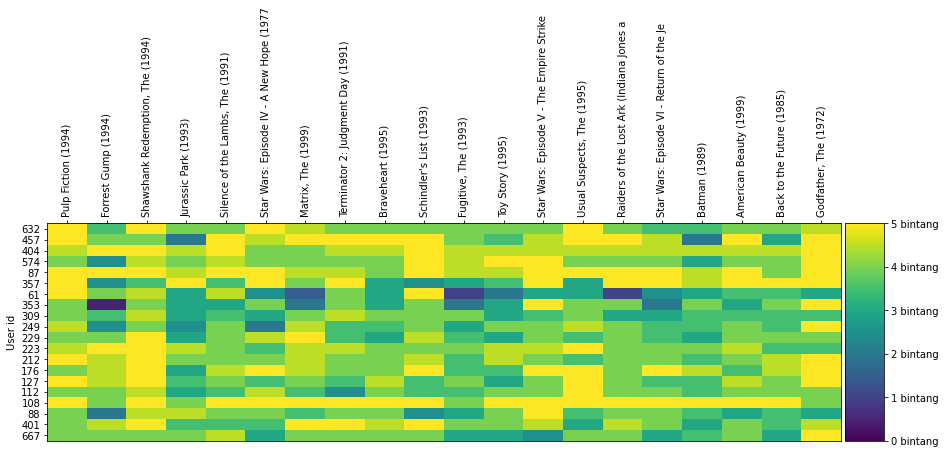

In [11]:
visualMoviesHeatmap(mntepRatedMoviesUsers)

In [11]:
#Setiap kolom adalah movie. Setiap baris adalah user. Warna sel adalah cara user merating movie tersebut 
#berdasarkan skala bintang bar di sebelah kanan
#warna putih adalah user tdk merating movie tersebut

In [12]:
#utk alasan kinerja, sya akan mnggunakan 1000 movie
user_movie_ratings =  pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
mostRatedMovies_1k = getMostRatedMovies(user_movie_ratings, 1000)

In [13]:
mostRatedMovies_1k

title  Pulp Fiction (1994)  Forrest Gump (1994)  \
0                      4.0                  3.0   
1                      NaN                  NaN   
2                      5.0                  3.0   
3                      4.0                  NaN   
4                      NaN                  NaN   
..                     ...                  ...   
663                    NaN                  5.0   
664                    4.0                  4.0   
665                    5.0                  NaN   
666                    4.5                  4.5   
667                    4.0                  4.0   

title  Shawshank Redemption, The (1994)  Jurassic Park (1993)  \
0                                   4.0                   3.5   
1                                   NaN                   NaN   
2                                   NaN                   4.0   
3                                   4.0                   NaN   
4                                   NaN                   3.0   
..                                  ...                   ...   
663                                 NaN                   2.0   
664                                 4.5                   3.5   
665                                 5.0                   NaN   
666                                 NaN                   NaN   
667                                 4.0                   4.0   

title  Silence of the Lambs, The (1991)  \
0                                   5.0   
1                                   NaN   
2                                   5.0   
3                                   4.0   
4                                   NaN   
..                                  ...   
663                                 3.0   
664                                 4.0   
665                                 3.0   
666                                 NaN   
667                                 4.5   

title  Star Wars: Episode IV - A New Hope (1977)  Matrix, The (1999)  \
0                                            4.5                 4.5   
1                                            4.0                 NaN   
2                                            NaN                 NaN   
3                                            NaN                 NaN   
4                                            NaN                 1.5   
..                                           ...                 ...   
663                                          3.0                 2.5   
664                                          3.0                 3.0   
665                                          5.0                 NaN   
666                                          NaN                 4.5   
667                                          3.0                 4.0   

title  Terminator 2: Judgment Day (1991)  Braveheart (1995)  \
0                                    3.5                4.0   
1                                    NaN                NaN   
2                                    3.0                NaN   
3                                    NaN                NaN   
4                                    NaN                0.5   
..                                   ...                ...   
663                                  NaN                5.0   
664                                  NaN                3.5   
665                                  4.0                NaN   
666                                  NaN                4.0   
667                                  4.0                4.0   

title  Schindler's List (1993)  ...  Black Sheep (1996)  Rocky III (1982)  \
0                          4.5  ...                 NaN               NaN   
1                          NaN  ...                 NaN               NaN   
2                          4.0  ...                 NaN               NaN   
3                          4.0  ...                 NaN               NaN   
4                          NaN  ...                 NaN               NaN   
..   

In [14]:
#krn dta yg dipunya memiliki nilai jrang maka sya akan mmbuat matriks jrng dgn csr matrix
#matrixSparseRatings = sp.sparse.csr_matrix(mostRatedMovies_1k)
matrixSparseRatings = csr_matrix(pd.SparseDataFrame(mostRatedMovies_1k).to_coo())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3456: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  return klass(values, index=self.index, name=items, fastpath=True)


Fit 1 clusters
Fit 6 clusters
Fit 11 clusters
Fit 16 clusters
Fit 21 clusters
Fit 26 clusters
Fit 31 clusters
Fit 36 clusters


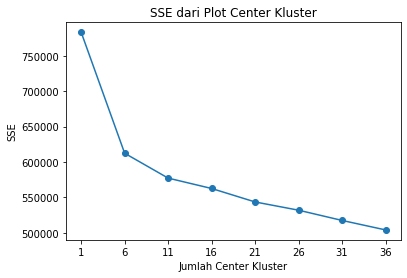

In [15]:
#sya akan mengcluster dengan menentukan jumlah K melalui metode elbow
#set range jumlah cluster
def findOptimalClusters(ratings, max_k):
    iters = range(1, max_k+1, 5)
    
    sse = []
    for k in iters:
        sse.append(KMeans(n_clusters=k, random_state=40).fit(ratings).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plot.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Jumlah Center Kluster')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE dari Plot Center Kluster')
    
findOptimalClusters(matrixSparseRatings, 40)

In [16]:
# 11 kluster
prediksi = KMeans(n_clusters=11, algorithm='full').fit_predict(matrixSparseRatings)

In [17]:
#visualisasi plot 11 kluster pke heatmap
#teknik visualisasi data yang menunjukkan besarnya fenomena sebagai warna dalam dua dimensi
#Variasi warna dapat dilakukan dengan rona atau intensitas, memberikan isyarat visual yang jelas kepada pembaca

#fungsi visualasidasi cluster heatmap
def visualMoviesClusters(kluster, max_users, max_movies):
    #c=1
    for klusterId in kluster.group.unique():
        #utk meningkatkan visibilitas, sya mnampilkan maksimal dari user dan maksimal dari movie per kluster.
        #nilai max dapat diubah2 utk mlihat lebih bnyak user dn movie per kluster
        a = kluster[kluster.group == klusterId].drop(['index', 'group'], axis=1)
        n_users_in_cluster = a.shape[0]
        
        a = filterRatingMovie(a, max_movies, max_users)
        
        a = a.reindex(a.mean().sort_values(ascending=False).index, axis=1)
        a = a.reindex(a.count(axis=1).sort_values(ascending=False).index)
        a = a.iloc[:max_users, :max_movies]
        n_users_in_plot = a.shape[0]
        
        #dsini sya hanya milih utk mnampilkan kluster yg memiliki lebih dari 10 user
        if len(a) > 10:
            print('kluster # {}'.format(klusterId))
            print('# user di kluster: {}.'.format(n_users_in_cluster), '# user di plot: {}'.format(n_users_in_plot))
            fig = plot.figure(figsize=(15,4))
            ax = plot.gca()

            ax.invert_yaxis()
            ax.xaxis.tick_top()
            labels = a.columns.str[:40]

            ax.set_yticks(np.arange(a.shape[0]) , minor=False)
            ax.set_xticks(np.arange(a.shape[1]) , minor=False)

            ax.set_xticklabels(labels, minor=False)
                        
            ax.get_yaxis().set_visible(False)

            # Heatmap
            heatmap = plot.imshow(a, vmin=0, vmax=5, aspect='auto')

            ax.set_xlabel('Movies')
            ax.set_ylabel('UserId')

            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.30)
    
            # Color bar
            cbar = fig.colorbar(heatmap, ticks=[5, 4, 3, 2, 1, 0], cax=cax)
            cbar.ax.set_yticklabels(['5','4','3','2','1','0'])

            plot.setp(ax.get_xticklabels(), rotation=90, fontsize=8)
            plot.tick_params(axis='both', which='both', bottom='off', top='off', left='off', labelbottom='off', labelleft='off') 
            #print('cluster # {} \n(tmpilkn yg plig tinggi {} user dan {} movies)'.format(cluster_id, max_users, max_movies))

            plot.show()

kluster # 1
# user di kluster: 70. # user di plot: 70


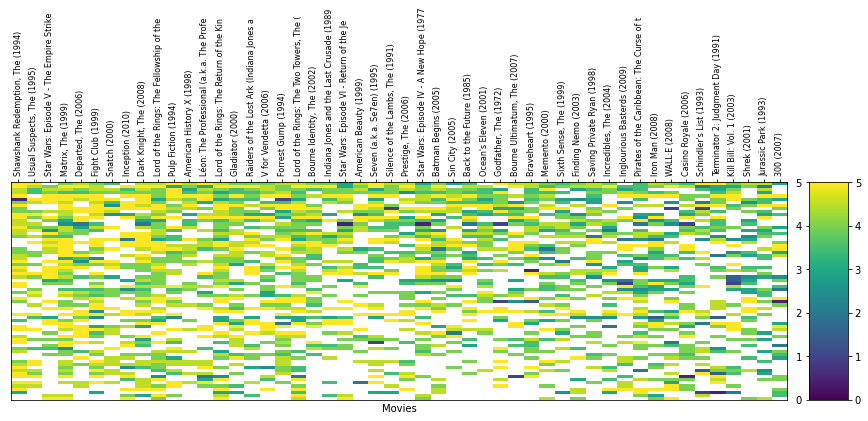

kluster # 7
# user di kluster: 36. # user di plot: 36


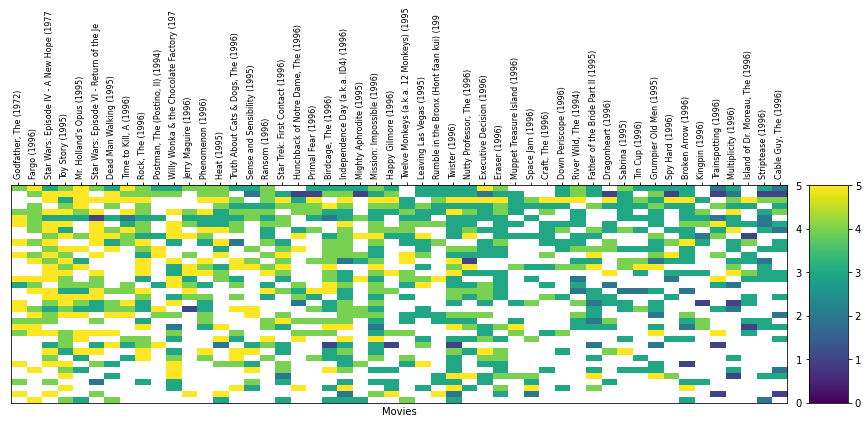

kluster # 6
# user di kluster: 106. # user di plot: 70


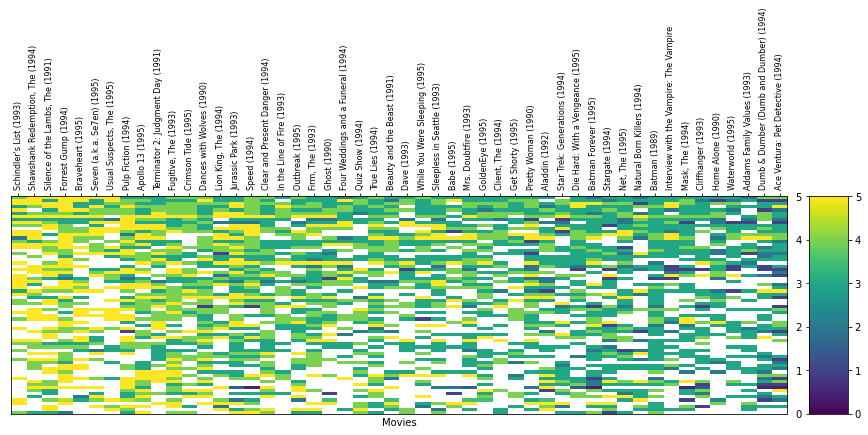

kluster # 2
# user di kluster: 335. # user di plot: 70


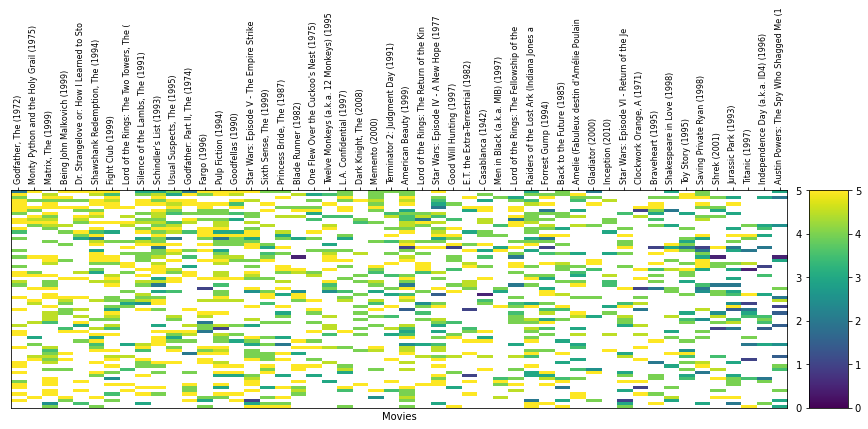

kluster # 8
# user di kluster: 28. # user di plot: 28


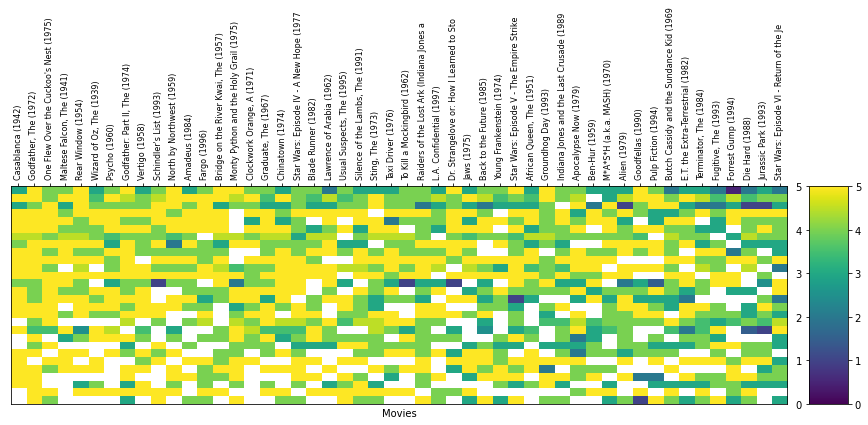

kluster # 0
# user di kluster: 67. # user di plot: 67


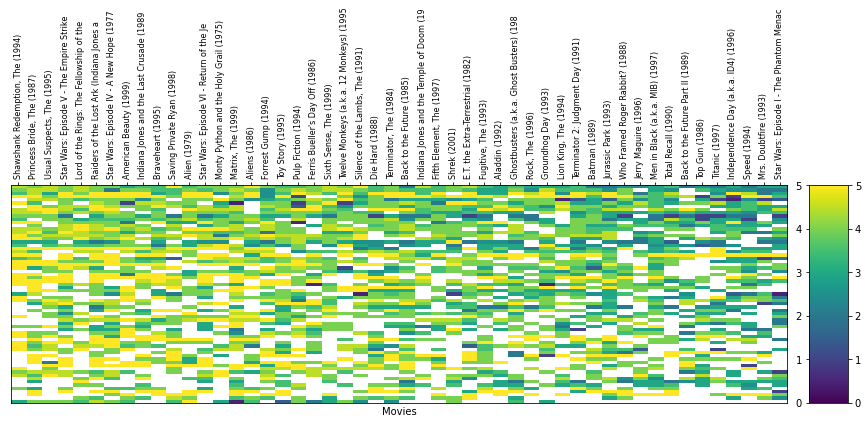

kluster # 4
# user di kluster: 11. # user di plot: 11


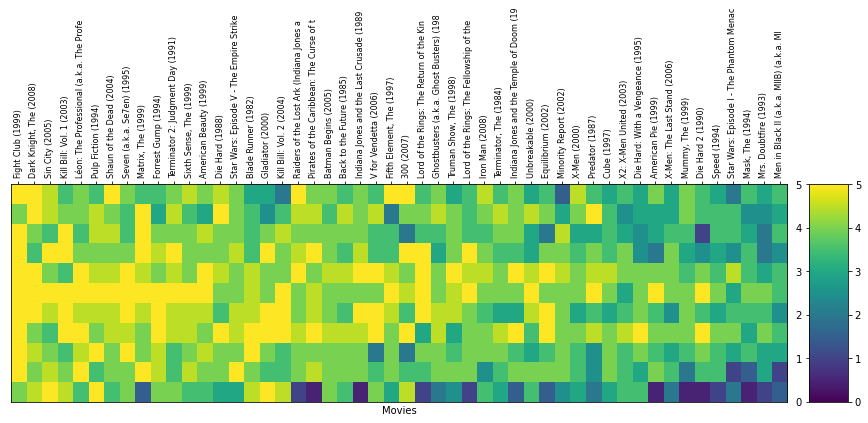

In [18]:
max_users = 70
max_movies = 50

kluster = pd.concat([mostRatedMovies_1k.reset_index(), pd.DataFrame({'group':prediksi})], axis=1)
visualMoviesClusters(kluster, max_users, max_movies)

In [35]:
#bisa dilihat diatas trdapat 9 cluster dgn msing2 cluster mmliki user lebih dri 10
#dari hasil cluster dpat diperhatikan :

#Semakin mirip rating dlm sebuah kluster, semakin bnyak garis vertikal dgn warna serupa yang dapat di teliti di cluster itu.
#dari bbrpa cluster yg ditampil ad bbrapa yg mnarik :

#1).bbrpa kluster lebih jarang/ksong dri yg lain, berisi orng2 yg menonton dan menilai film lebih sedikit daripada di cluster lain.
#2).bbrpa kluster sbagian besar berwarna kuning yg brarti orang-orang yang sangat menyukai movie tertentu,
#kluster lain sbgaian besar berwarna hijau tua /biru muda yg berarti berisi orang2 yg setuju bahwa movie tertentu berhak mndpatkan 2-3 bntang.
#3).jika di prhatikan movie berubah di setiap kluster. Grafik memfilter data hnya utk mnmpilkan film dengan rating tertinggi dlm sbuag cluster trsbt, lalu mengurutkannya berdasarkan rating rata2.
#4).jika dlihat garis horizontal dengan warna yang mirip pda cluster trtntu, itu mrpkan user yg tdk memiliki banyak variasi dalam peringkatnya.

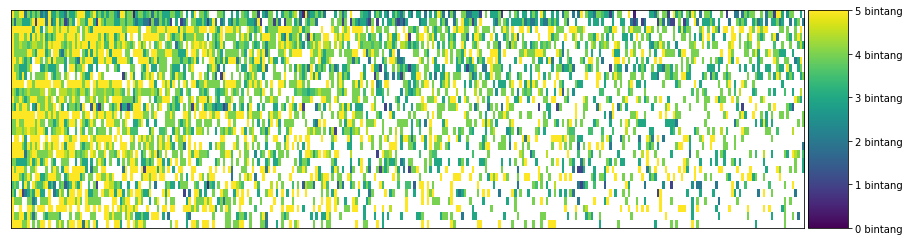

In [19]:
#prediksi
#sya akn coba memlih cluster dn pengguna trtntu dn melihat ap yg ad dlamnya
#pilih kluster dari hasil yg sblumnya tlah di proses

noCluster = 8

#sya akn filter utk mlihat wilayah kluster data dgn jumlah nilai paling banyak
n_users = 100
n_movies = 300
klustering = kluster[kluster.group == noCluster].drop(['index', 'group'], axis=1)

klustering = filterRatingMovie(klustering, n_movies, n_users)
visualMoviesHeatmap(klustering, axis_labels=False)

In [20]:
#lihat dlm bntuk tabel
klustering

Godfather, The (1972)  \
15                    5.0   
16                    4.0   
3                     5.0   
17                    5.0   
7                     5.0   
24                    5.0   
11                    5.0   
9                     5.0   
26                    5.0   
19                    5.0   
10                    4.5   
27                    5.0   
14                    4.0   
1                     5.0   
8                     4.0   
22                    4.0   
21                    NaN   
4                     5.0   
2                     5.0   
20                    4.0   
6                     5.0   
5                     5.0   
12                    3.5   
25                    4.0   
0                     5.0   
13                    5.0   
18                    5.0   
23                    5.0   

    Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)  \
15                                                4.0                                
16                                                2.0                                
3                                                 5.0                                
17                                                4.0                                
7                                                 4.0                                
24                                                4.0                                
11                                                5.0                                
9                                                 4.0                                
26                                                5.0                                
19                                                5.0                                
10                                                4.0                                
27                                                4.0                                
14                                                3.0                                
1                                                 5.0                                
8                                                 4.0                                
22                                                4.0                                
21                                                5.0                                
4                                                 5.0                                
2                                                 5.0                                
20                                                4.0                                
6                                                 4.0                                
5                                                 5.0                                
12                                                4.0                                
25                                                3.0                                
0                                                 4.0                                
13                                                NaN                                
18                                                4.0                                
23                                                5.0                                

    Star Wars: Episode IV - A New Hope (1977)  Godfather: Part II, The (1974)  \
15                                        4.0                             5.0   
16                                        4.0                             4.0   
3                                         5.0                             5.0   
17                                        4.0                             5.0   
7                                         4.0                             4.5   
24                                        4.0                             4.0   
11                                        4.0                             5.0   
9                  

In [29]:
#normalisasi matriks menghapus userid yang mengisi movie dengan dulplikat rating/ dgn rating yg sama
matriks_norm = klustering.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)

#mengisi smua dgn nilai 0 / mewakili user yang tidak memberikan rating
matriks_norm.fillna(0, inplace=True)
#proses mengubah baris ke – 1 menjadi kolom ke – 1, baris ke – 2 menjadi kolom ke – 2, baris ke – 3 menjadi kolom ke – 3 pda matriks
matriks_norm = matriks_norm.T
matriks_norm = matriks_norm.loc[:, (matriks_norm != 0).any(axis=0)]

In [30]:
#membuat matrix sparse/matriks jarang agar bisa di baca oleh fungsi yg akan dibuat nnti
matriks_sparse = csr_matrix(matriks_norm.values)

In [31]:
from sklearn.metrics.pairwise import euclidean_distances
#matriks ini akan menampilkan nilai-nilai similarity pke metod ecludian antar user-user dan item-item
item_similarity = euclidean_distances(matriks_sparse)
user_similarity = euclidean_distances(matriks_sparse.T)

In [32]:
#masukan matriks similarity kedalam objekdataset
item_sim_dataset = pd.DataFrame(item_similarity, index = matriks_norm.index, columns = matriks_norm.index)
user_sim_dataset = pd.DataFrame(user_similarity, index = matriks_norm.columns, columns = matriks_norm.columns)

In [33]:
#membuat fungsi untuk menampilkan 10 top movie dengan nilai similarity tertinggi
def top_movies(movies_title):
    count = 1
    print('movie yang sama dengan {} include:\n'.format(movies_title))
    for item in item_sim_dataset.sort_values(by = movies_title, ascending = False).index[1:11]:
        print('No. {}: {}'.format(count, item))
        count +=1

In [34]:
#membuat fungsi utk menampilkan top 10 user dengan nilai similarity tertinggi
def top_users(user):
    
    if user not in matriks_norm.columns:
        return('tdak ada data tersedia di user {}'.format(user))
    
    print('user paling mirip:\n')
    sim_values = user_sim_dataset.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:11]
    sim_users = user_sim_dataset.sort_values(by=user, ascending=False).index[1:11]
    zipped = zip(sim_users, sim_values,)
    for user, sim in zipped:
        print('User #{0}, nilai similarity: {1:.2f}'.format(user, sim))

In [35]:
import operator
#membuat fungsi daftar yg berisi movie dengan nilai similarity tertinggi per pengguna yang mirip/serupa
#dan mengembalikan nama movie yang memliki nilai similarity yg sama pda daftar
def similar_user_recs(user):
    
    if user not in matriks_norm.columns:
        return('tdak ada data tersedia di user {}'.format(user))
    
    sim_users = user_sim_dataset.sort_values(by=user, ascending=False).index[1:11]
    best = []
    most_common = {}
    
    for i in sim_users:
        max_score = matriks_norm.loc[:, i].max()
        best.append(matriks_norm[matriks_norm.loc[:, i]==max_score].index.tolist())
    for i in range(len(best)):
        for j in best[i]:
            if j in most_common:
                most_common[j] += 1
            else:
                most_common[j] = 1
    sorted_list = sorted(most_common.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_list[:5]

In [38]:
#membuat fungsi rata-rata prediksi dari user yang serupa
#untuk menentukan rating yng bgus utk user
def predicted_rating(movies_title, user):
    sim_users = user_sim_dataset.sort_values(by=user, ascending=False).index[1:668]
    user_values = user_sim_dataset.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:668]
    rating_list = []
    weight_list = []
    for j, i in enumerate(sim_users):
        rating = klustering.loc[i, movies_title]
        similarity = user_values[j]
        if np.isnan(rating):
            continue
        elif not np.isnan(rating):
            rating_list.append(rating*similarity)
            weight_list.append(similarity)
    try:
        result = sum(rating_list)/sum(weight_list)
    except ZeroDivisionError:
        result = 0
    return result

In [39]:
top_movies('Serpico (1973)')

movie yang sama dengan Serpico (1973) include:

No. 1: Lost World: Jurassic Park, The (1997)
No. 2: Mission: Impossible (1996)
No. 3: Batman Forever (1995)
No. 4: Independence Day (a.k.a. ID4) (1996)
No. 5: Godfather, The (1972)
No. 6: North by Northwest (1959)
No. 7: Austin Powers: International Man of Mystery (1997)
No. 8: Forrest Gump (1994)
No. 9: Star Trek IV: The Voyage Home (1986)
No. 10: Apocalypse Now (1979)


In [40]:
top_users(15)

user paling mirip:

User #16, nilai similarity: 4.98
User #14, nilai similarity: 4.88
User #24, nilai similarity: 4.77
User #3, nilai similarity: 4.45
User #19, nilai similarity: 4.44
User #6, nilai similarity: 4.39
User #21, nilai similarity: 4.34
User #25, nilai similarity: 4.28
User #13, nilai similarity: 4.26
User #5, nilai similarity: 4.24


In [41]:
similar_user_recs(15)

[("One Flew Over the Cuckoo's Nest (1975)", 9),
 ('North by Northwest (1959)', 7),
 ("Schindler's List (1993)", 7),
 ('Casablanca (1942)', 7),
 ('Rear Window (1954)', 6)]

In [42]:
predicted_rating('Serpico (1973)', 15)

3.797810313906195

In [39]:
#klustering.loc[13, :]

In [44]:
#mmbuat rata2 error yang dihasilkan rekomendasi utk melihat kinerja yg dihsilkan
#lihat kinerja rekomendasi yg diberikan pda user 13
watched = klustering.T[klustering.loc[15,:]>0].index.tolist()

In [45]:
mae = []

for i in watched:
    actual=klustering.loc[15, i]
    predicted = predicted_rating(i, 15)
    mae.append(abs(actual-predicted))

In [46]:
print ('Nilai MAE yg dihasilkan :') 
mae = np.mean(mae)
mae

Nilai MAE yg dihasilkan :


0.9107941489128745

In [49]:
mse = []

for i in watched:
    actual=klustering.loc[15, i]
    predicted = predicted_rating(i, 15)
    mse.append((actual-predicted)**2)

In [50]:
print ('Nilai RMSE yg dihasilkan :') 
mse = np.mean(mse)
rmse = np.sqrt(mse)
rmse

Nilai RMSE yg dihasilkan :


1.1472769363798743